In [49]:
import numpy as np

import random

mat = np.array([np.array([random.choice([0,1]) for i in range(2)]) for j in range(2)])

vec = np.array([1,2])

image = np.matmul(mat,vec)

print(mat)

print(vec)

print(image,type(image))

print(image + np.array([1,1]))

[[0 1]
 [1 1]]
[1 2]
[2 3] <class 'numpy.ndarray'>
[3 4]


[array([[-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
       [ 0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ]]), array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. , -0.5],
       [ 0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]]), array([[ 0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. , 

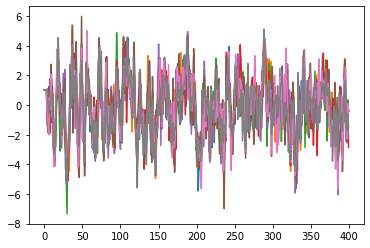

In [50]:
import matplotlib.pyplot as plt

num_obs = 400

num_vars = 8

order = 4

mats = []

for i in range(order):
    
    mat = np.array([np.array([random.choice([-.5,.5]+[0]*(10+2**i)) for i in range(num_vars)]) for j in range(num_vars)])
    
    mats.append(mat)

print(mats)

#obs = [np.array([np.random.normal(0,1) for i in range(num_vars)])]

obs = [np.array([1]*num_vars)]*order

for i in range(num_obs - order):
    
    noise = np.array([np.random.normal(0,1) for j in range(num_vars)])
    
    obs.append(np.sum([np.matmul(mat,obs[-1*j - 1]) for j in range(order)]) + noise)
    
print(obs[-1])

obs = np.array(obs)

plt.plot(range(num_obs),obs)

plt.show()

In [51]:
X_train = np.array([np.concatenate(obs[i:i+7]) for i in range(num_obs - 7)])

X_train[:3]

len(X_train)

len(X_train[0])


56

In [52]:
y_train = np.array([obs[i+7] for i in range(num_obs - 7)])

y_train[:3]

array([[-0.42347097, -1.2814276 , -1.01026182, -1.50561834, -1.5375458 ,
        -1.26035171,  0.51130117, -0.20543257],
       [-1.13624687, -0.26443168, -0.02671167,  1.78758804,  0.33877769,
        -1.90742038, -0.28555357,  0.27836534],
       [ 0.43370143,  2.76576783,  2.7257436 ,  0.88404126,  2.09689306,
         2.70386847,  2.06739001,  0.53634938]])

In [53]:
from sklearn.tree import DecisionTreeRegressor

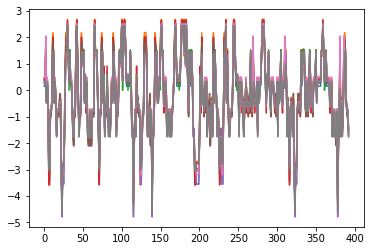

[-0.29092496 -0.09392296 -0.1249078  -0.13251282 -0.18216982 -0.20207855
 -0.18849548 -0.23614811] 4.818593106878632 3.3178191108751287 0.3114548090522772


In [75]:
model = DecisionTreeRegressor(max_depth = 4)

model.fit(X_train,y_train)

preds_train = model.predict(X_train)

plt.plot(range(len(y_train)), preds_train)

plt.show()

mean_true_train = np.array([np.array([y_train[i][j] for i in range(len(y_train))]).mean() for j in range(num_vars)])

var_true_train = np.array([(((y_train[i] - mean_true_train)**2).sum())**.5 for i in range(len(y_train))]).mean()

res_train = np.array([(((y_train[i] - preds_train[i])**2).sum())**.5 for i in range(len(y_train))]).mean()

R2_train = 1 - res_train/var_true_train

print(mean_true_train, var_true_train, res_train, R2_train)

In [87]:
trump_train = pd.read_csv('export.csv')

trump_train.head()

,col
0,"[0, 0, 0, 0, 0, 0, 0, 0]"
1,"[0, 1, 0, 0, 1, 0, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0]"


In [88]:
s = [np.array([int(i[1]) for i in trump_train.col[j].split(',')]) for j in range(len(trump_train))]

trump_train = pd.DataFrame({'col':s})

print(trump_train.head(5),type(trump_train.col[0]))

                        col
0  [0, 0, 0, 0, 0, 0, 0, 0]
1  [0, 1, 0, 0, 1, 0, 0, 0]
2  [0, 0, 0, 0, 0, 0, 0, 0]
3  [0, 0, 0, 0, 0, 0, 0, 0]
4  [0, 0, 0, 0, 0, 0, 0, 0] <class 'numpy.ndarray'>


In [89]:
len(trump_train)

2653

In [90]:
obs = trump_train.col.values

num_obs = len(obs)

X = np.array([np.concatenate(obs[i:i+9]) for i in range(num_obs - 9)])

X[:3]

len(X)


2644

In [91]:
y = np.array([obs[i+9] for i in range(num_obs - 9)])

len(y)

2644

1983
1983


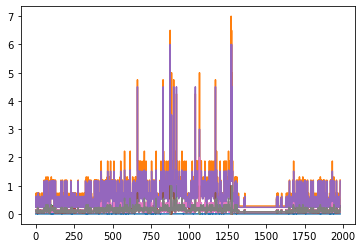

[0.00151286 0.6878467  0.13414019 0.14170449 0.61119516 0.11094302
 0.11800303 0.1301059 ] 1.4278105667814882 1.2618013105560406 0.11626840428815344


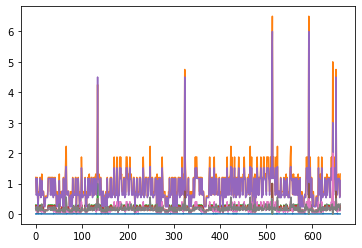

[0.         1.25718608 0.27836611 0.19667171 1.14372163 0.22541604
 0.18608169 0.19213313] 2.0436004914870716 1.9428414437768136 0.049304669934258305


In [92]:
import math

X_train = X[:math.floor(len(X)*.75)]

print(len(X_train))

y_train = y[:math.floor(len(y)*.75)]

print(len(y_train))

X_test = X[math.floor(len(X)*.75):]

y_test = y[math.floor(len(X)*.75):]

model = DecisionTreeRegressor(max_depth = 4)

model.fit(X_train,y_train)

preds_train = model.predict(X_train)

preds_test = model.predict(X_test)

plt.plot(range(len(y_train)), preds_train)

plt.show()

mean_true_train = np.array([np.array([y_train[i][j] for i in range(len(y_train))]).mean() for j in range(num_vars)])


var_true_train = np.array([(((y_train[i] - mean_true_train)**2).sum())**.5 for i in range(len(y_train))]).mean()

res_train = np.array([(((y_train[i] - preds_train[i])**2).sum())**.5 for i in range(len(y_train))]).mean()

R2_train = 1 - res_train/var_true_train

print(mean_true_train, var_true_train, res_train, R2_train)


plt.plot(range(len(y_test)), preds_test)

plt.show()

mean_true_test = np.array([np.array([y_test[i][j] for i in range(len(y_test))]).mean() for j in range(num_vars)])

var_true_test = np.array([(((y_test[i] - mean_true_test)**2).sum())**.5 for i in range(len(y_test))]).mean()

res_test = np.array([(((y_test[i] - preds_test[i])**2).sum())**.5 for i in range(len(y_test))]).mean()

R2_test = 1 - res_test/var_true_test

print(mean_true_test, var_true_test, res_test, R2_test)



In [98]:
df_var = pd.read_csv('export_var.csv')

df_var = df_var.drop(['dates'],axis=1)

df_var.head(4)

,0,1,2,3,4,5,6,7
0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0


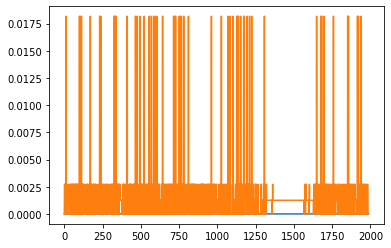

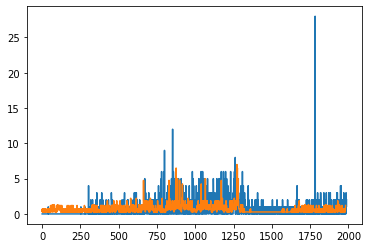

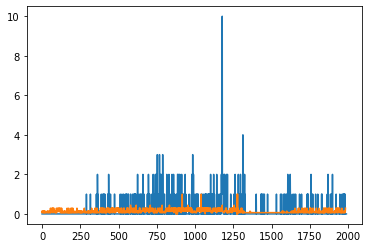

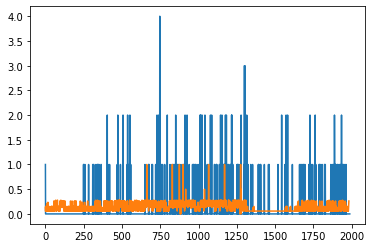

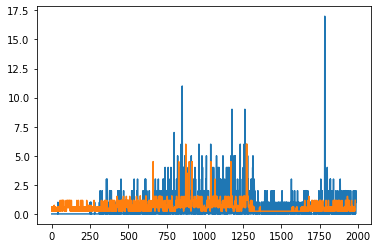

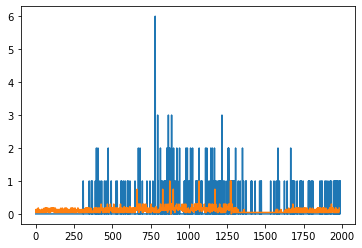

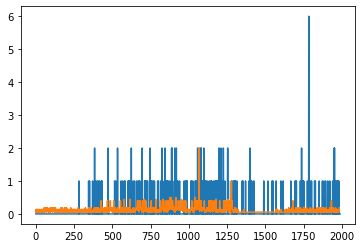

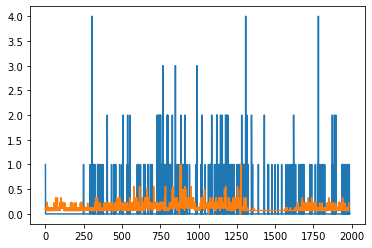

In [108]:
for i in df_var.columns:
    
    train = df_var[i][:math.floor(len(df_var)*.75)]

    plt.plot(range(len(train)),train)
    
    plt.plot(range(len(y_train)), [ob[int(i)] for ob in preds_train])
    
    plt.show()
    
    plt.close()

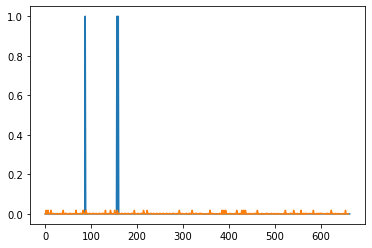

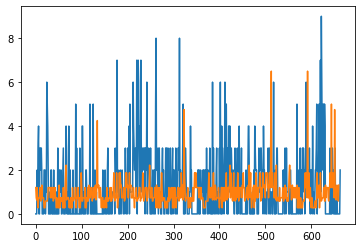

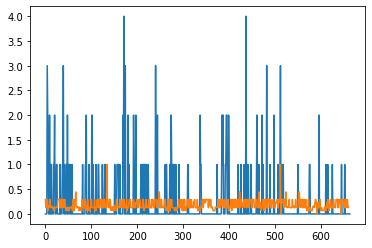

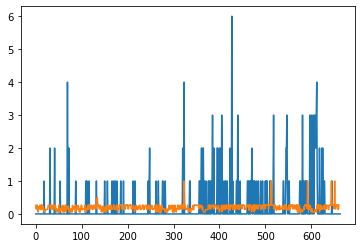

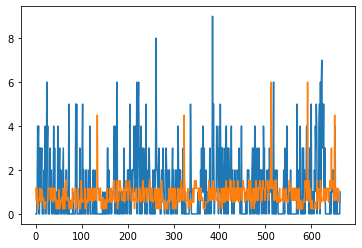

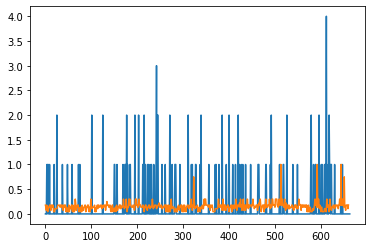

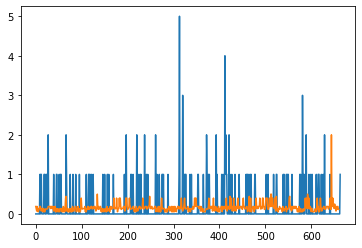

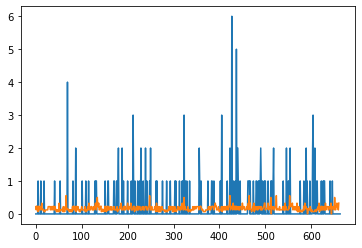

In [110]:
for i in df_var.columns:

    test = df_var[i][math.floor(len(df_var)*.75):]
    
    plt.plot(range(len(test)),test)
    
    plt.plot(range(len(y_test)), [ob[int(i)] for ob in preds_test])
    
    plt.show()
    
    plt.close()

In [99]:
from statsmodels.tsa.api import VAR

model = VAR(np.asarray(data))

In [125]:

model2 = VAR(np.asarray(df_var_log))

In [126]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model2.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -27.056604429705075
BIC :  -26.89688308985062
FPE :  1.7760945747076359e-12
HQIC:  -26.998791723481535 

Lag Order = 2
AIC :  -27.066601418702223
BIC :  -26.764811098047637
FPE :  1.758429539641255e-12
HQIC:  -26.957363356488106 

Lag Order = 3
AIC :  -27.171311381701866
BIC :  -26.72736308592977
FPE :  1.5836213410311377e-12
HQIC:  -27.010613776845776 

Lag Order = 4
AIC :  -27.149568018516582
BIC :  -26.563372662847335
FPE :  1.6184411116944654e-12
HQIC:  -26.937376648602587 

Lag Order = 5
AIC :  -27.143279721583625
BIC :  -26.414748130649084
FPE :  1.6286658684370975e-12
HQIC:  -26.87956032838042 

Lag Order = 6
AIC :  -27.16413972540997
BIC :  -26.293182633127
FPE :  1.5950661827759307e-12
HQIC:  -26.848858014819932 

Lag Order = 7
AIC :  -27.180051378671678
BIC :  -26.16657942811546
FPE :  1.5699174959704266e-12
HQIC:  -26.81317302067984 

Lag Order = 8
AIC :  -27.157063982612698
BIC :  -26.000987725889807
FPE :  1.6064653231278042e-12
HQIC:  -26.738554611235

In [129]:
best_var_log = model2.fit(3)

In [130]:
best_var_log.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2019
Time:                     03:23:51
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -26.7274
Nobs:                     2650.00    HQIC:                  -27.0106
Log likelihood:           6120.49    FPE:                1.58362e-12
AIC:                     -27.1713    Det(Omega_mle):     1.46902e-12
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001113         0.000650            1.712           0.087
L1.y1         0.000633         0.018558            0.034           0.973
L1.y2        -0.003132         0.003373           -0.929           0.353
L1.y3        -0.001209

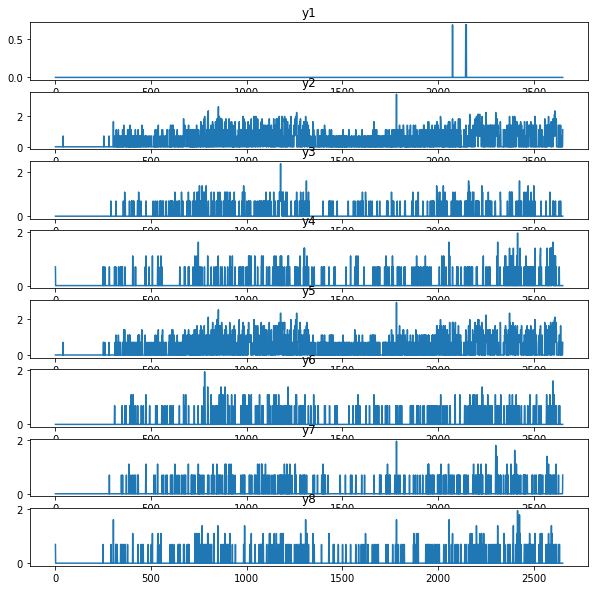

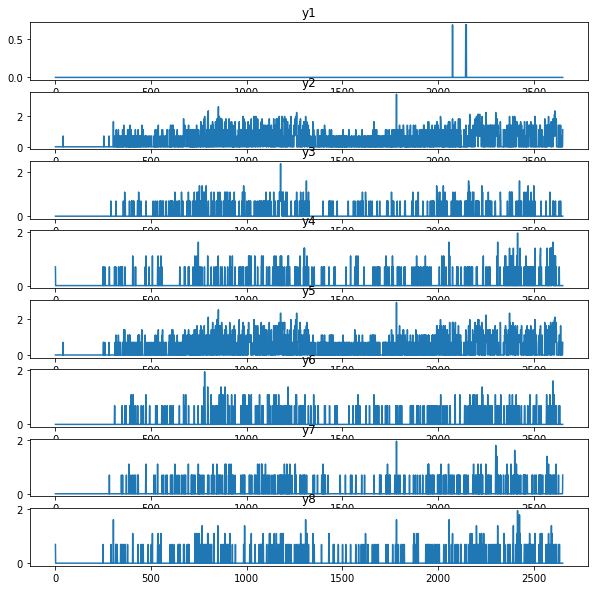

In [131]:
best_var_log.plot()

In [138]:
for attr in dir(best_var_log):
    if not attr.startswith('_'):
        print(attr)

acf
acorr
aic
bic
bse
coefs
coefs_exog
cov_params
cov_ybar
dates
detomega
df_model
df_resid
endog
endog_lagged
exog
exog_names
fevd
fittedvalues
forecast
forecast_cov
forecast_interval
fpe
get_eq_index
hqic
info_criteria
intercept
intercept_longrun
irf
irf_errband_mc
irf_resim
is_stable
k_ar
k_exog
k_exog_user
k_trend
llf
long_run_effects
ma_rep
mean
model
mse
n_totobs
names
neqs
nobs
orth_ma_rep
params
plot
plot_acorr
plot_forecast
plot_sample_acorr
plotsim
pvalues
pvalues_dt
pvalues_endog_lagged
reorder
resid
resid_acorr
resid_acov
resid_corr
roots
sample_acorr
sample_acov
sigma_u
sigma_u_mle
simulate_var
stderr
stderr_dt
stderr_endog_lagged
summary
test_causality
test_inst_causality
test_normality
test_whiteness
to_vecm
trend
tvalues
tvalues_dt
tvalues_endog_lagged
y
ys_lagged


In [141]:
best_var_log.mse(10)

array([[[4.85941370e-04, 7.72107327e-04, 3.81980301e-04, 3.40658519e-04,
         8.54955336e-04, 1.67718260e-04, 4.64298464e-04, 2.63684121e-04],
        [7.72107327e-04, 2.68955352e-01, 2.82493005e-02, 1.75327754e-02,
         2.07299847e-01, 5.55781722e-02, 5.07315734e-02, 3.77085787e-02],
        [3.81980301e-04, 2.82493005e-02, 7.75110122e-02, 2.65586485e-03,
         5.91843261e-02, 1.25095221e-02, 1.01139765e-02, 1.49930157e-02],
        [3.40658519e-04, 1.75327754e-02, 2.65586485e-03, 7.12048334e-02,
         3.71612093e-02, 1.03834845e-02, 1.15108210e-02, 2.75441962e-02],
        [8.54955336e-04, 2.07299847e-01, 5.91843261e-02, 3.71612093e-02,
         2.50141006e-01, 2.18141372e-02, 2.08822221e-02, 1.91996148e-02],
        [1.67718260e-04, 5.55781722e-02, 1.25095221e-02, 1.03834845e-02,
         2.18141372e-02, 6.36959662e-02, 6.22967022e-03, 4.42961509e-03],
        [4.64298464e-04, 5.07315734e-02, 1.01139765e-02, 1.15108210e-02,
         2.08822221e-02, 6.22967022e-03, 6.05

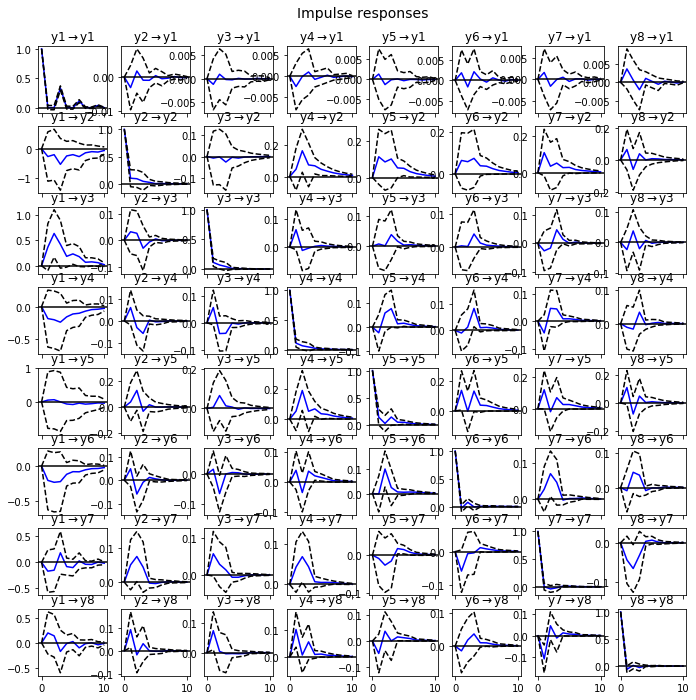

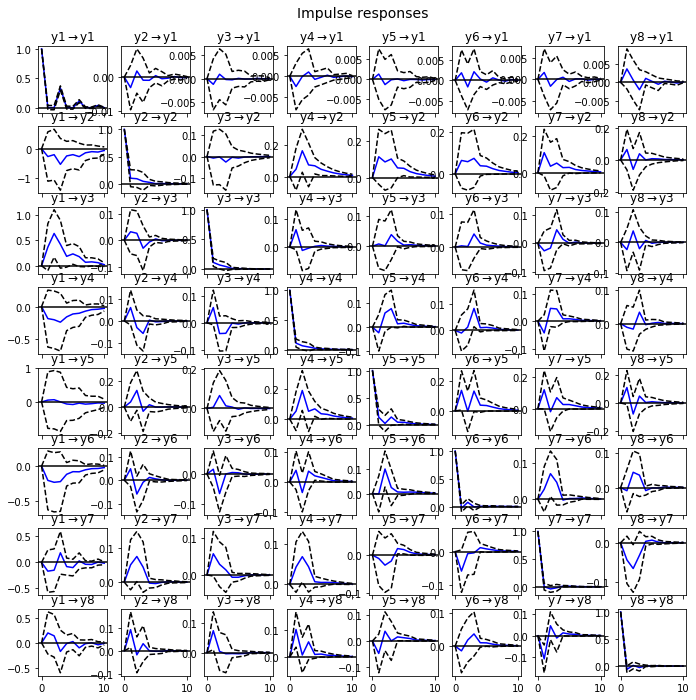

In [132]:
irf = best_var_log.irf(10)

irf.plot(orth=False)

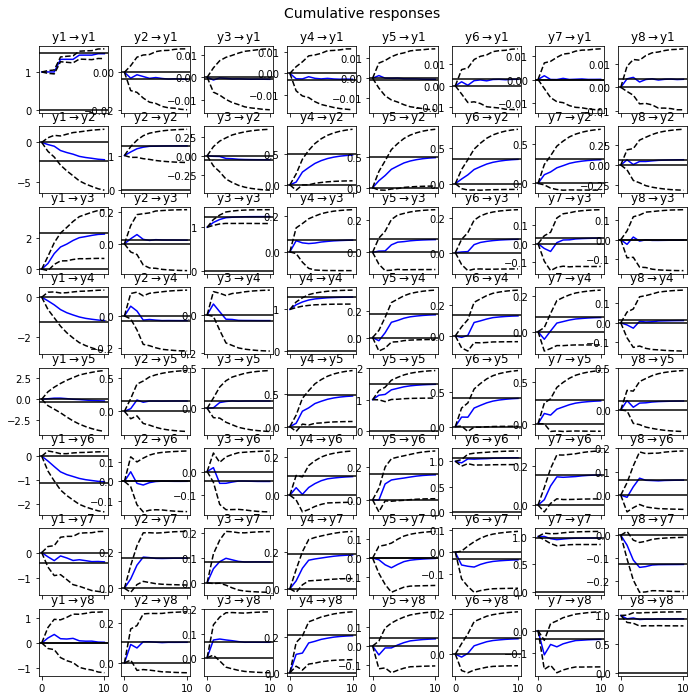

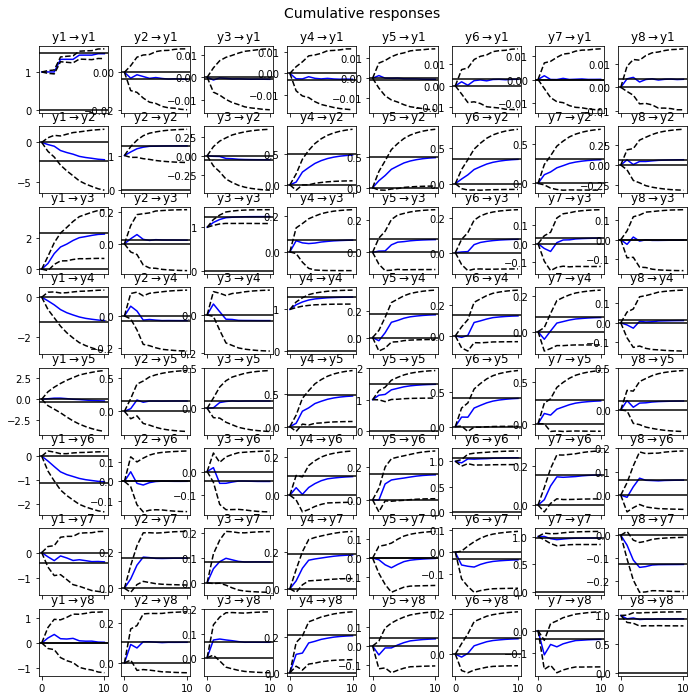

In [133]:
irf.plot_cum_effects(orth=False)

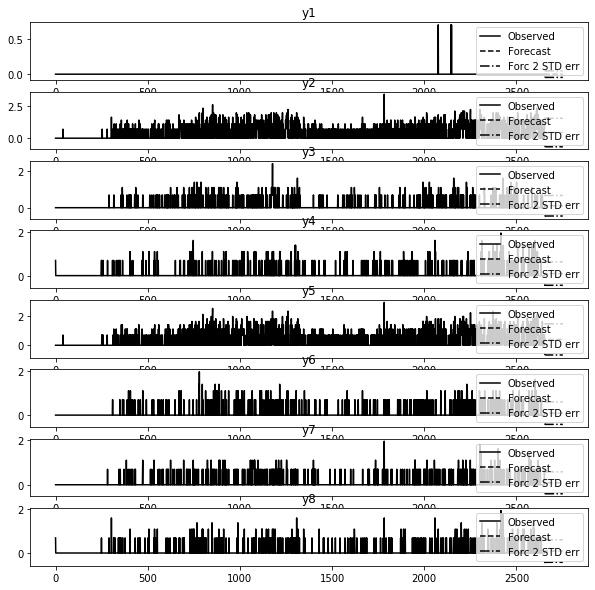

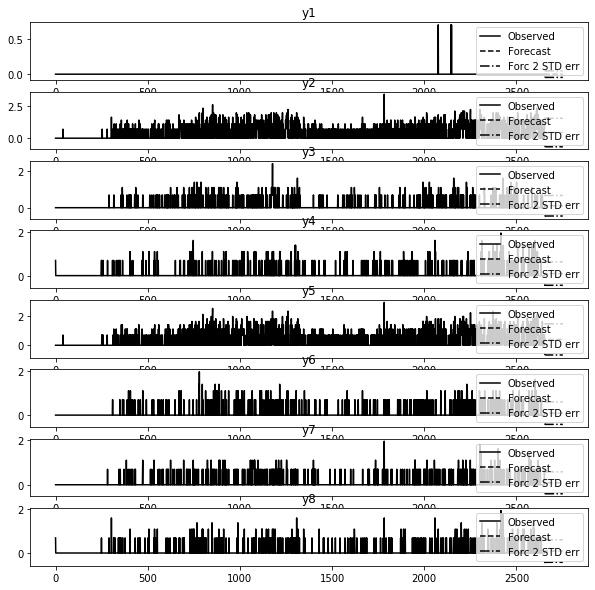

In [135]:
best_var_log.plot_forecast(100)

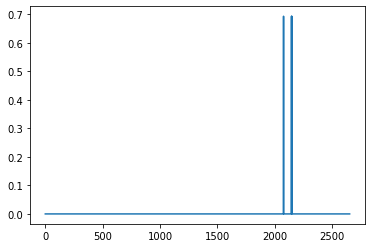

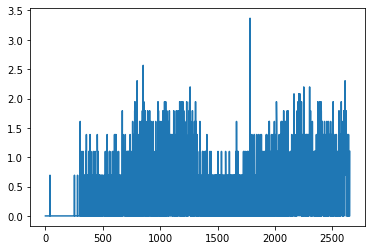

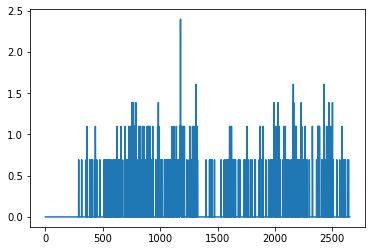

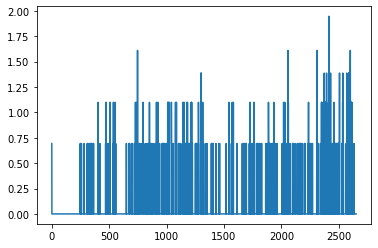

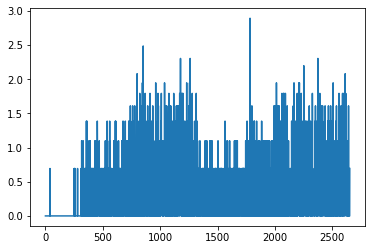

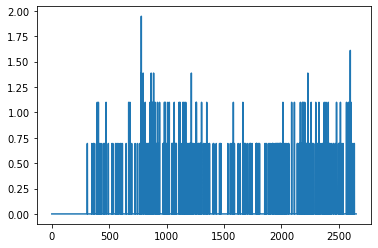

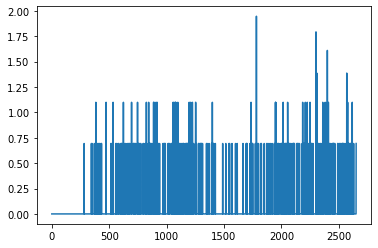

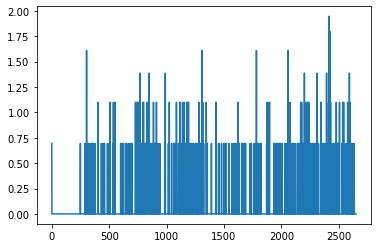

In [136]:
for i in df_var_log.columns:
    
    plt.plot(df_var_log[i])
    
    plt.show()
    
    plt.close()

In [128]:
pvals = []

for c in df_var_log.columns:
    
    row = []
    
    for r in df_var_log.columns:
            
        test_result = grangercausalitytests(df_var_log[[r, c]], maxlag=maxlag, verbose=False)
            
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            
        min_p_value = np.min(p_values)
            
        row.append(min_p_value)
            
    pvals.append(row)
    
pvals

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [254]:
pvals = []

for c in data.columns:
    
    row = []
    
    for r in data.columns:
            
        test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            
        min_p_value = np.min(p_values)
            
        row.append(min_p_value)
            
    pvals.append(row)
    
pvals

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [101]:
maxlag

5

In [ ]:
[[1.0, 0.7218, 0.0077, 0.4252, 0.5496, 0.5575, 0.4276, 0.52],
 [0.2994, 1.0, 0.0013, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.5849, 0.0146, 1.0, 0.0014, 0.1073, 0.0233, 0.0091, 0.0249],
 [0.5795, 0.0001, 0.0002, 1.0, 0.0004, 0.0, 0.0612, 0.0016],
 [0.2973, 0.0019, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.5768, 0.0549, 0.0257, 0.01, 0.0, 1.0, 0.0001, 0.0],
 [0.5775, 0.0939, 0.6233, 0.3179, 0.0, 0.0, 1.0, 0.021],
 [0.4774, 0.0685, 0.1156, 0.1005, 0.0001, 0.002, 0.533, 1.0]]

In [ ]:
[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 1, 1, 0, 1],
 [0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 0, 0]]

In [111]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  1.9178222694685498
BIC :  2.6376348559749916
FPE :  6.80653715067822
HQIC:  2.2029054613839594 

Lag Order = 2
AIC :  2.008585492491587
BIC :  3.3707901978149124
FPE :  7.4558694504088985
HQIC:  2.5481425412851904 

Lag Order = 3
AIC :  1.9754184707683364
BIC :  3.9824392670843016
FPE :  7.219267358098192
HQIC:  2.7704598736243558 

Lag Order = 4
AIC :  0.8591233828362493
BIC :  3.5133995236725695
FPE :  2.368419196274227
HQIC:  1.9106660897422238 

Lag Order = 5
AIC :  1.0383290688094111
BIC :  4.342315222955154
FPE :  2.841500383902488
HQIC:  2.347396538992225 

Lag Order = 6
AIC :  1.1774360376398902
BIC :  5.133602424555602
FPE :  3.279828537948803
HQIC:  2.745058296627187 

Lag Order = 7
AIC :  1.316020196744113
BIC :  5.9268527234931785
FPE :  3.790511203280063
HQIC:  3.143233894059478 

Lag Order = 8
AIC :  1.401814366801299
BIC :  6.669814766523341
FPE :  4.164261305587782
HQIC:  3.4896628343017286 

Lag Order = 9
AIC :  1.5523045740667891
BIC :  7.47999054

In [112]:
best_var = model.fit(4)

In [113]:
best_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2019
Time:                     02:37:11
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    3.51340
Nobs:                     396.000    HQIC:                   1.91067
Log likelihood:          -4401.30    FPE:                    2.36842
AIC:                     0.859123    Det(Omega_mle):         1.24842
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.103429         0.053799           -1.922           0.055
L1.y1         0.384537         0.051047            7.533           0.000
L1.y2         0.021110         0.051791            0.408           0.684
L1.y3         0.011265

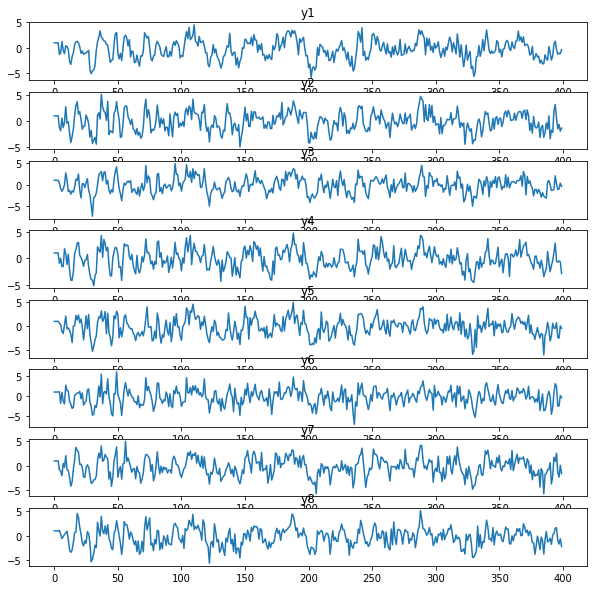

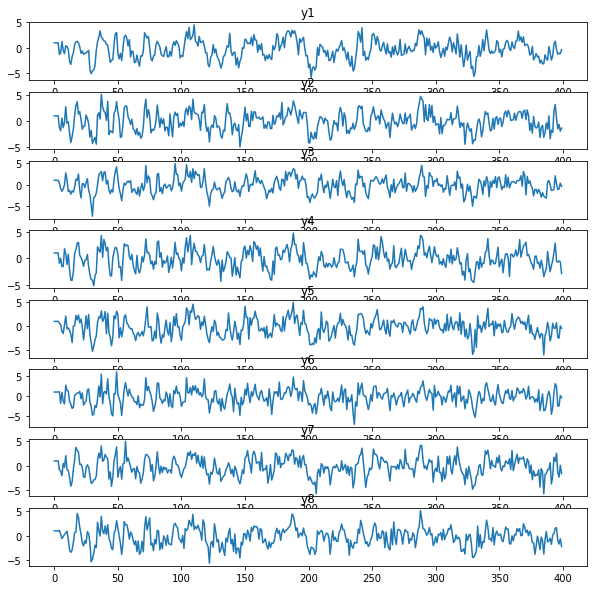

In [114]:
best_var.plot()

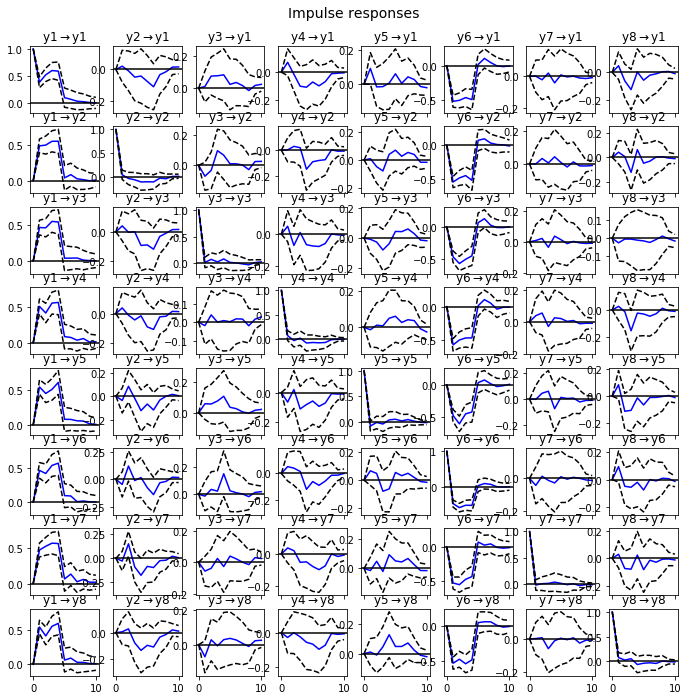

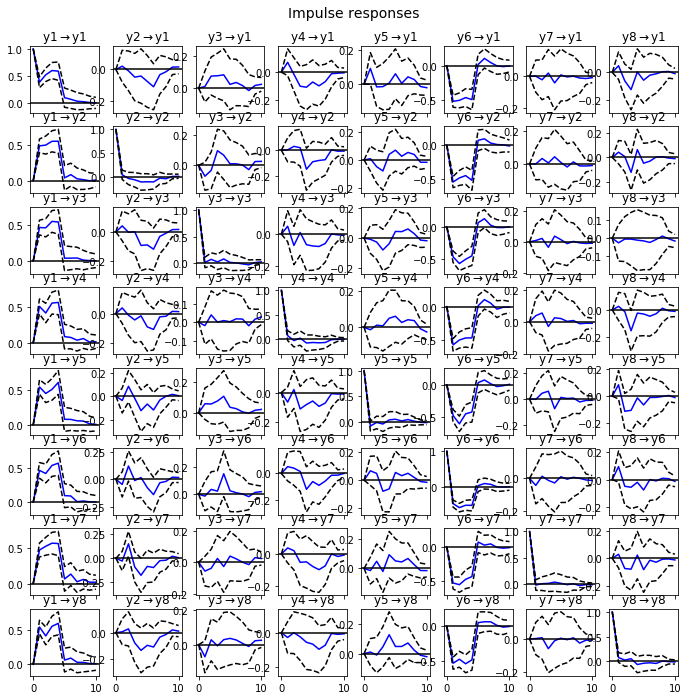

In [115]:
impulse_response = best_var.irf(10)

impulse_response.plot(orth = False)

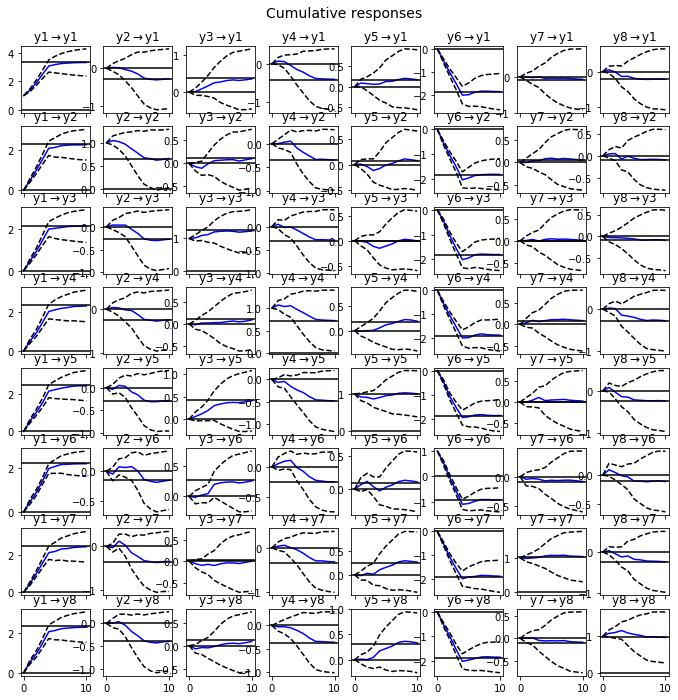

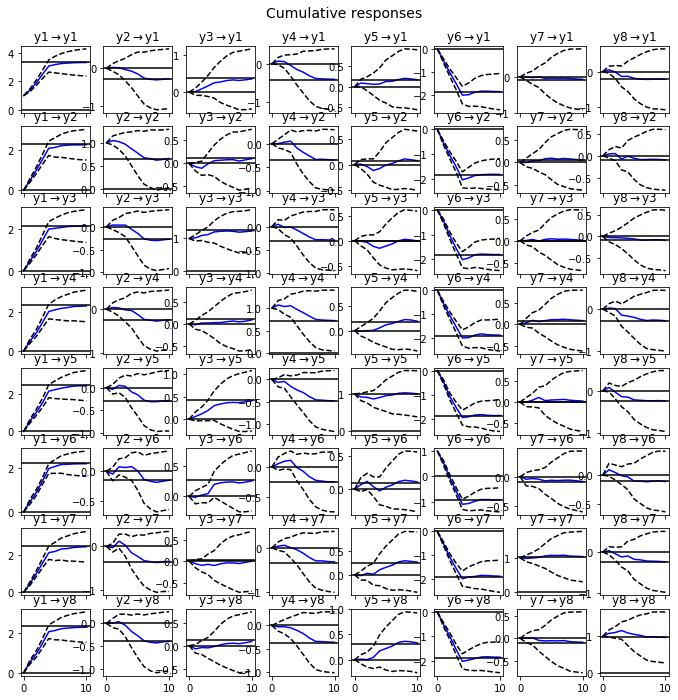

In [116]:
impulse_response.plot_cum_effects(orth=False)

In [118]:
df_var.head(5)

,0,1,2,3,4,5,6,7
0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [120]:
df_var_log = np.log(df_var + 1)

df_var_log.head(5)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [233]:
df_us = pd.read_csv('export_usgov2.csv')

df_us.vector[0]

'[0.         0.         0.         0.         0.         0.\n 0.         3.31394359]'

In [214]:
# def get_array(x):
    
#     out = []
    
#     for i in range(1,len(x)):
        
#         if x[i-1] == '.':
            
#             try:
                
#                 out.append(float(x[i-1:-1]))
                
#             except:
                
#                 out = out
            
            
#         try:
            
#             out.append(float(x[i]))
            
#         except:
            
#             out = out
            
#     return(out)

def get_array(x):
    
    out = []
    
    for i in x:
        
        try:
            
            out.append(float(i))
            
        except:
            
            out = out
            
    return(out)

def fix(x):
    
    result = x[:7]
    
    r = str(int(x[7])) + '.'

    for i in x[8:]:
    
        r = r + str(int(i))
        
    result.append(float(r))
    
    return(result)

# print(fix(get_array(df_us.vector[0].split(',')[0])))

# count = 0

# for i in df_us.vector[0].split(',')[0]:
    
#     print(count,i)
    
#     count = count + 1
    
# [(len(df_us.vector[i].split(',')[0]),i) for i in range(len(df_us)) if len(df_us.vector[i].split(',')[0]) != 82]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.31394359]
0 [
1 0
2 .
3  
4  
5  
6  
7  
8  
9  
10  
11  
12 0
13 .
14  
15  
16  
17  
18  
19  
20  
21  
22  
23 0
24 .
25  
26  
27  
28  
29  
30  
31  
32  
33  
34 0
35 .
36  
37  
38  
39  
40  
41  
42  
43  
44  
45 0
46 .
47  
48  
49  
50  
51  
52  
53  
54  
55  
56 0
57 .
58 

59  
60 0
61 .
62  
63  
64  
65  
66  
67  
68  
69  
70  
71 3
72 .
73 3
74 1
75 3
76 9
77 4
78 3
79 5
80 9
81 ]


[(75, 3),
 (75, 6),
 (90, 8),
 (90, 9),
 (90, 10),
 (83, 11),
 (90, 12),
 (90, 13),
 (90, 14),
 (90, 15),
 (90, 16),
 (90, 17),
 (90, 18),
 (90, 19),
 (90, 20),
 (90, 21),
 (90, 22),
 (90, 23),
 (90, 24),
 (90, 25),
 (90, 26),
 (90, 27),
 (90, 28),
 (90, 29),
 (90, 30),
 (83, 31),
 (90, 32),
 (90, 33),
 (90, 34),
 (90, 35),
 (90, 36),
 (90, 37),
 (90, 38),
 (90, 39),
 (90, 40),
 (83, 41),
 (90, 42),
 (90, 43),
 (90, 44),
 (83, 45),
 (90, 46),
 (90, 47),
 (90, 48),
 (90, 49),
 (90, 50),
 (90, 51),
 (90, 52),
 (90, 53),
 (90, 60),
 (90, 61),
 (83, 62),
 (90, 63),
 (90, 64),
 (90, 65),
 (90, 66),
 (90, 67),
 (90, 68),
 (90, 69),
 (90, 70),
 (90, 71),
 (90, 72),
 (90, 73),
 (90, 74),
 (90, 75),
 (90, 76),
 (90, 77),
 (90, 78),
 (90, 79),
 (90, 80),
 (90, 81),
 (90, 82),
 (90, 83),
 (90, 84),
 (90, 85),
 (90, 86),
 (90, 87),
 (90, 88),
 (90, 89),
 (90, 90),
 (90, 91),
 (83, 92),
 (90, 93),
 (90, 94),
 (90, 99),
 (90, 100),
 (83, 101),
 (90, 102),
 (90, 103),
 (90, 104),
 (90, 105),
 (90, 10

In [210]:
# x = ['1','2','3']

# print(int(3.0))

# r = str(x[0]) + '.'

# for i in x[1:]:
    
#     r = r + i
    
# float(r)

3


1.23

In [193]:
df_us.vector[407]

'[0.        0.        0.        0.        0.        0.        0.\n 1.5498965]'

In [234]:
s = [np.array(fix(get_array(df_us.vector[j].split(',')[0]))) for j in range(len(df_us))]

df_us = pd.DataFrame({'dates':df_us.SQLDATE,'vector':s})

print(df_us.head(5),type(df_us.vector[0]))

                      dates                                           vector
0  2014-09-18T00:00:00.000Z  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.31394359]
1  2014-09-23T00:00:00.000Z  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.96243892]
2  2014-09-29T00:00:00.000Z  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.54063331]
3  2014-10-08T00:00:00.000Z   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9079249]
4  2014-10-16T00:00:00.000Z  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.60389153] <class 'numpy.ndarray'>


In [216]:
df_us.vector[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.31394359])

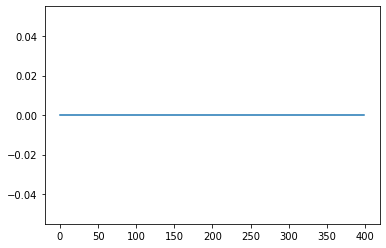

In [222]:
plt.plot([i[5] for i in df_us.vector[800:1200]])

plt.show()

In [232]:
df_trumpdate = pd.read_csv('export_trump_w_date.csv')

print(df_trumpdate.head(5))

df_us.head(5)

   0  1  2  3  4  5  6  7                     dates
0  0  0  0  1  0  0  0  1  2012-07-30T00:00:00.000Z
1  0  0  0  0  0  0  0  0  2012-07-31T00:00:00.000Z
2  0  0  0  0  0  0  0  0  2012-08-01T00:00:00.000Z
3  0  0  0  0  0  0  0  0  2012-08-02T00:00:00.000Z
4  0  0  0  0  0  0  0  0  2012-08-03T00:00:00.000Z


,SQLDATE,vector
0,2014-09-18T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.31394359]"
1,2014-09-23T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.96243892]"
2,2014-09-29T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.54063331]"
3,2014-10-08T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9079249]"
4,2014-10-16T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.60389153]"


In [ ]:
df_trump

In [235]:
df_join = pd.merge(df_us,df_trumpdate,on='dates',how='left')

df_join.head(5)

,dates,vector,0,1,2,3,4,5,6,7
0,2014-09-18T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.31394359]",0,0,0,0,0,0,0,0
1,2014-09-23T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.96243892]",0,2,0,0,2,0,0,0
2,2014-09-29T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.54063331]",0,2,0,0,0,1,0,1
3,2014-10-08T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9079249]",0,1,0,0,1,0,0,0
4,2014-10-16T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.60389153]",0,0,0,0,0,0,0,0


In [236]:
X = np.array([np.array([df_join[str(i)][j] for i in range(8)]) for j in range(len(df_join))])

y = np.array([i[-1] for i in df_join.vector])

print(X[:2])

print(y[:2])

[[0 0 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0]]
[3.31394359 2.96243892]


1617
1617


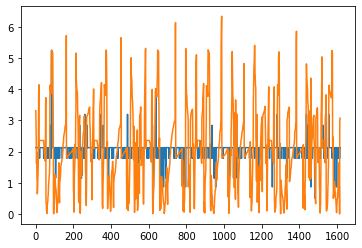

In [238]:
X_train = X[:math.floor(len(X)*.75)]

print(len(X_train))

y_train = y[:math.floor(len(y)*.75)]

print(len(y_train))

X_test = X[math.floor(len(X)*.75):]

y_test = y[math.floor(len(X)*.75):]

model = DecisionTreeRegressor(max_depth = 4)

model.fit(X_train,y_train)

preds_train = model.predict(X_train)

preds_test = model.predict(X_test)

plt.plot(range(len(y_train)), preds_train)

plt.plot(y_train)

plt.show()

In [241]:
model.score

<bound method RegressorMixin.score of DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')>

2.079464613920841 1.5625878255133436 1.50889099899506 0.034364037426595884


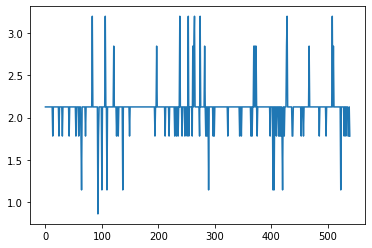

2.0521179866481485 1.3942868334820828 1.4452052317271047 -0.03651931368946415


In [243]:
mean_true_train = y_train.mean()

var_true_train = np.array([(y_train[i] - mean_true_train)**2 for i in range(len(y_train))]).mean()

res_train = np.array([(y_train[i] - preds_train[i])**2 for i in range(len(y_train))]).mean()

R2_train = 1 - res_train/var_true_train

print(mean_true_train, var_true_train, res_train, R2_train)


plt.plot(range(len(y_test)), preds_test)

plt.show()

mean_true_test = y_test.mean()

var_true_test = np.array([(y_test[i] - mean_true_test)**2 for i in range(len(y_test))]).mean()

res_test = np.array([(y_test[i] - preds_test[i])**2 for i in range(len(y_test))]).mean()

R2_test = 1 - res_test/var_true_test

print(mean_true_test, var_true_test, res_test, R2_test)






In [244]:
chn_tone = pd.read_csv('export_chn.csv')

chn_tone.head(5)

,dates,tone
0,2007-11-02T00:00:00.000Z,-2.780410
1,2007-11-07T00:00:00.000Z,-2.792584
2,2007-11-11T00:00:00.000Z,-2.802323
3,2007-11-13T00:00:00.000Z,-2.807192
4,2007-11-14T00:00:00.000Z,-2.809627


In [245]:
chn_tone = chn_tone.sort_values(by = ['dates'])

chn_tone.head(5)

,dates,tone
2467,2004-02-24T00:00:00.000Z,4.200542
2129,2004-02-25T00:00:00.000Z,4.190749
5033,2004-02-26T00:00:00.000Z,4.180955
1016,2004-02-27T00:00:00.000Z,4.171162
2130,2004-02-28T00:00:00.000Z,4.161369


In [246]:
join_tone = pd.merge(df_us,chn_tone,on='dates',how='left')

join_tone.head(5)

,dates,vector,tone
0,2014-09-18T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.31394359]",1.095197
1,2014-09-23T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.96243892]",1.712310
2,2014-09-29T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.54063331]",5.144567
3,2014-10-08T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9079249]",0.000000
4,2014-10-16T00:00:00.000Z,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.60389153]",3.035682


In [250]:
us_tones = np.array([i[-1] for i in join_tone.vector])

chn_tones = join_tone.tone.values

print(len(us_tones),len(chn_tones))

tone_df = pd.DataFrame({'US':us_tones,'China':chn_tones})

tone_df.head(5)

2157 2157


,US,China
0,3.313944,1.095197
1,2.962439,1.712310
2,2.540633,5.144567
3,1.907925,0.000000
4,1.603892,3.035682


In [253]:
grangercausalitytests(tone_df[['US','China']], maxlag=maxlag, verbose=False)

{1: ({'ssr_ftest': (3.073244937803234, 0.07973276616759689, 2153.0, 1),
   'ssr_chi2test': (3.077527211288329, 0.0793811306849618, 1),
   'lrtest': (3.0753328303858325, 0.07948832217607088, 1),
   'params_ftest': (3.0732449378032625, 0.07973276616759689, 2153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.7897916767982665, 0.02275143420956218, 2150.0, 2),
   'ssr_chi2test': (7.597210291628153, 0.022401997593543978, 2),
   'lrtest': (7.583850126759444, 0.022552145726772523, 2),
   'params_ftest': (3.7897916767987163, 0.02275143420955044, 2150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.5133748733346644, 0.05682642196777868, 2147.0, 3),
   'ssr_chi2test': (7.564708165574569, 0.055918926421664406, 3),
   'lrtest': (7.551455802143209, 0.0562509684996939, 3),
   'params_ftest': (2.51337487333449, 0.05682642196778918, 2147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [258]:
grangercausalitytests(tone_df[['China','US']], maxlag=maxlag, verbose=False)

{1: ({'ssr_ftest': (0.02432712195178862, 0.8760700749295515, 2153.0, 1),
   'ssr_chi2test': (0.024361019474248145, 0.875969828820479, 1),
   'lrtest': (0.024360881845495896, 0.8759701763424039, 1),
   'params_ftest': (0.02432712195167159, 0.8760700749307594, 2153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5498323233303238, 0.5771276771712732, 2150.0, 2),
   'ssr_chi2test': (1.1022220063040447, 0.5763091732634197, 2),
   'lrtest': (1.1019402245747187, 0.5763903756813593, 2),
   'params_ftest': (0.5498323233305323, 0.5771276771712045, 2150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.40921575793075793, 0.746396851371314, 2147.0, 3),
   'ssr_chi2test': (1.231649849906175, 0.7454238051445286, 3),
   'lrtest': (1.2312978574882436, 0.7455079921034624, 3),
   'params_ftest': (0.4092157579306288, 0.7463968513714285, 2147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [255]:
model3 = VAR(np.asarray(tone_df))

In [256]:
result3 = model3.fit(3)

In [257]:
result3.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 05, Dec, 2019
Time:                     06:45:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.635136
Nobs:                     2154.00    HQIC:                  0.611744
Log likelihood:          -6743.10    FPE:                    1.81893
AIC:                     0.598251    Det(Omega_mle):         1.80717
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.290628         0.026872           10.815           0.000
L1.y1         0.928800         0.021580           43.040           0.000
L1.y2         0.004561         0.005776            0.790           0.430
L2.y1        -0.051450